# Elastix

This notebooks show very basic image registration examples with on-the-fly generated binary images.

In [1]:
from itk import itkElastixRegistrationMethodPython
from itk import itkTransformixFilterPython
import itk
import numpy as np
import matplotlib.pyplot as plt

## Image generators

In [5]:
def image_generator(x1, x2, y1, y2, mask=False, artefact=False):
    if mask:
        image = np.zeros([100, 100], np.uint8)
    else:
        image = np.zeros([100, 100], np.float32)
    image[y1:y2, x1:x2] = 1
    if artefact:
        image[-10:, :] = 1
    image = itk.image_view_from_array(image)
    return image

### Masked Registration Test

In [6]:
# Create rigid transformed test images with artefact
fixed_image = image_generator(25, 75, 25, 75, artefact=True)
moving_image = image_generator(1, 51, 10, 60, artefact=True)

# Create mask for artefact
fixed_mask = image_generator(0, 100, 0, 90, mask=True)
moving_mask = image_generator(0, 100, 0, 90, mask=True)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid')
parameter_object.AddParameterMap(default_rigid_parameter_map)

# Call registration function
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    fixed_mask=fixed_mask,
    moving_mask=moving_mask,
    parameter_object=parameter_object)

### Masked Registration Test Visualization

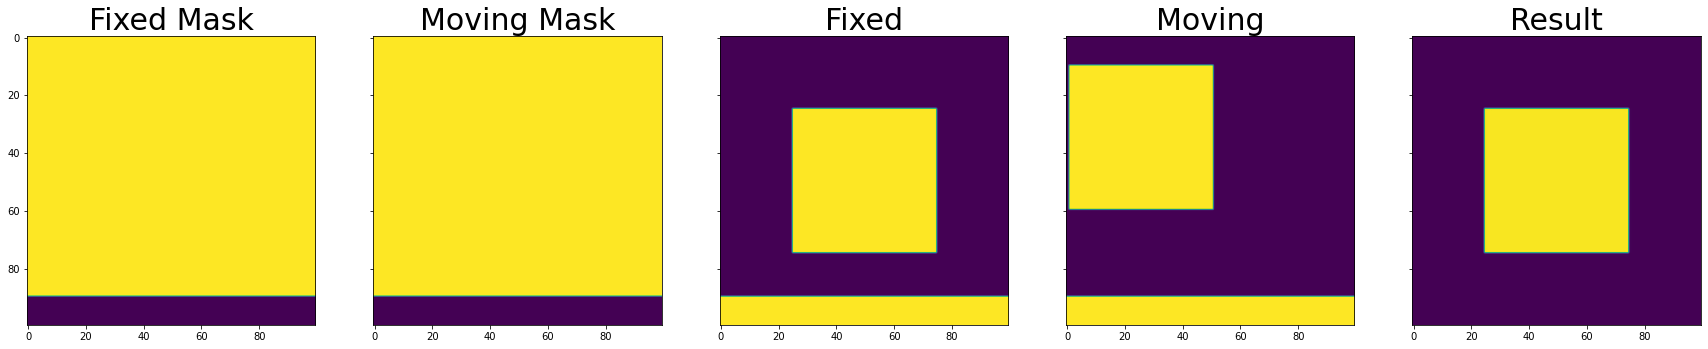

In [7]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,5, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(fixed_mask)
axs[0].set_title('Fixed Mask', fontsize=30)
axs[1].imshow(moving_mask)
axs[1].set_title('Moving Mask', fontsize=30)
axs[2].imshow(fixed_image)
axs[2].set_title('Fixed', fontsize=30)
axs[3].imshow(moving_image)
axs[3].set_title('Moving', fontsize=30)
axs[4].imshow(result_image)
axs[4].set_title('Result', fontsize=30)
plt.show()